# 3D Wannier trap equalization

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

## Homogenization

4 site before and after homogenization
```python
# Original
mu_i =  [-35.07979296 -36.45742512 -36.45742518 -35.07979291]
t_ij = [[0.         0.62168537 0.06147376 0.01229187]
 [0.62168537 0.         0.50724968 0.06147376]
 [0.06147376 0.50724968 0.         0.6216853 ]
 [0.01229187 0.06147376 0.6216853  0.        ]]
U_i = [[[0.9221694  0.83751111 0.8375111  0.92216941]]]

# Homogenize chemical potential
mu_i =  [-35.76860884 -35.76860895 -35.76860883 -35.76860884]
t_ij = [[0.         0.60499375 0.05681103 0.01018166]
 [0.60499375 0.         0.49975357 0.05681095]
 [0.05681103 0.49975357 0.         0.60499376]
 [0.01018166 0.05681095 0.60499376 0.        ]]
U_i = [[[0.96845579 0.8025313  0.8025313  0.96845579]]]

# Homogenize chemical potential & tunneling
mu_i =  [-35.70955015 -35.85647977 -35.85647987 -35.70955005]
t_ij = [[0.         0.56991368 0.06079975 0.01045773]
 [0.56991368 0.         0.56991367 0.0607998 ]
 [0.06079975 0.56991367 0.         0.56991367]
 [0.01045773 0.0607998  0.56991367 0.        ]]
U_i = [[[0.9705881  0.79897655 0.79897654 0.97058811]]]
```

The trap center depth is affected mainly by two neighboring traps, but the trap barrier is only mostly affected by the its two neighboring sites. So for trap depth, the edge trap may differ much from the bulk ones, but the barrier seems more uniform.

## Homogenize chemical potential

### 1D Waseem parameter

Original

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=[930, 1250]nm
lattice: Full lattice sizes: [4 1 1]
lattice: lattice constants: [1.4516129  1.61290323 1.4516129 ]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.86s.
H_solver: eigenstates memory usage: 0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonali

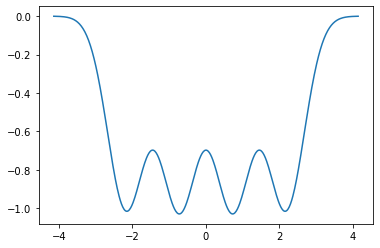

In [5]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([4], dtype=int),
              lc=(1350, 1500),
              trap=(50, [930, 1250]),
              band=1,
              dim=3,
              avg=1,
              sparse=True,
              symmetry=True)

import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)

V1 = dvr.Vfun(x, 0, 0)
plt.plot(x, V1)

E, W, parity = eigen_basis(dvr)
A, U = optimization(dvr, E, W, parity)
A = A[0]
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

Equalize chemical potential

In [1]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([4], dtype=int),
              lc=(1350, 1500),
              trap=(50, [930, 1250]),
              band=1,
              dim=3,
              avg=1,
              sparse=True,
              homogenize=True,
              symmetry=True)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=[930, 1250]nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [4 1 1]
lattice: lattice constants: [1.4516129  1.61290323 1.4516129 ]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.78s.
H_solver: eigenstates memory usage: 0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussia

H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.68s.
H_solver: eigenstates memory usage: 0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.65s.
H_solver: eigenstates memory usage: 0.46 MiB.
Optimizing...
Terminated - min grad norm reached after 60 iterations, 0.02 seconds.

Trap site position of Wannier functions: [1 0 3 2]
Order of Wannier function is set to match trap site.
mu_i =  [-35.76860884 -35.76860895 -35.76860883 -35.76860884]
t_ij = [[0.    

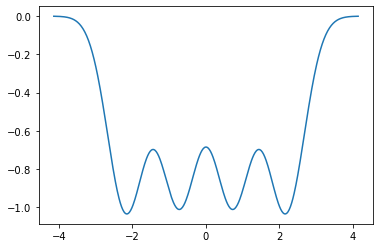

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)

V1 = dvr.Vfun(x, 0, 0)
plt.plot(x, V1)

E, W, parity = eigen_basis(dvr)
A, U = optimization(dvr, E, W, parity)
A = A[0]
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

### 2D Waseem parameter

In [2]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([4], dtype=int),
              band=1,
              dim=1,
              avg=1 / 2,
              sparse=True,
              homogenize=True,
              symmetry=True)


DVR: dx=[0.15]w is set.
DVR: n=[20] is set.
DVR: R0=[3.]w is set.
['x']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [4 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15]w is set.
DVR: n=[35] is set.
DVR: R0=[5.28]w is set.
H_op: n=[35] dx=[0.15]w p=[1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
Optimizing...
Iteration    Cost                   

H_op: n=[35] dx=[0.15]w p=[1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +1.0866933845274225e+01    2.69329842e+00    
   2         +7.0380132052307651e+00    5.96689367e+00    
   3         +4.5838546951561412e+00    1.01431245e+01    
   4         +4.0131914557801061e+00    1

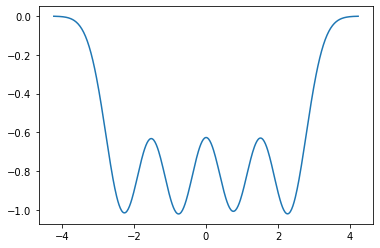

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)

V1 = dvr.Vfun(x, 0, 0)
plt.plot(x, V1)

E, W, parity = eigen_basis(dvr)
A, U = optimization(dvr, E, W, parity)
A = A[0]
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


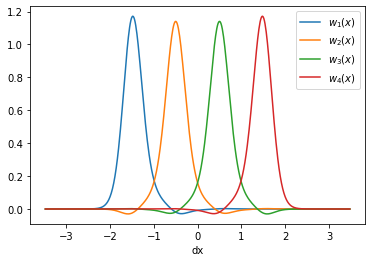

In [3]:
import matplotlib.pyplot as plt

mu = 0
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0.25])
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu], parity[mu],
                          [x, y, z]).reshape(-1, dvr.Nsite)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
plt.legend()

In [4]:
def cost_func(dvr, offset):
    dvr.bands = 1
    dvr.Voff = offset
    A, __ = optimization(dvr, *eigen_basis(dvr))
    return np.var(np.diag(A[0]))


cost_func(dvr, dvr.Voff)

H_op: n=[35] dx=[0.15]w p=[1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[35] dx=[0.15]w p=[-1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
Optimizing...
Iteration    Cost                       Gradient norm     
---------    -----------------------    --------------    
   1         +9.9979656255795781e+00    5.21313222e+00    
   2         +5.0381465262584744e+00    7.46132548e+00    
   3         +4.8728537723058185e+00    1.19838783e+01    
   4         +4.2253062153477892e+00    1

8.845510368638228e-07

## Homogenize chemical potential and tunneling

$L=4$ site

In [1]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([4], dtype=int),
              lc=(1350, 1500),
              trap=(50, [930, 1250]),
              band=1,
              dim=3,
              avg=1,
              sparse=True,
              homogenize=True,
              symmetry=True)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=[930, 1250]nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [4 1 1]
lattice: lattice constants: [1.4516129  1.61290323 1.4516129 ]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[34 20 20] is set.
DVR: R0=[5.17741935 3.         7.2       ]w is set.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.89s.
H_solver: eigenstates memory usage: 0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussia

H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.83s.
H_solver: eigenstates memory usage: 0.47 MiB.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[34 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.64s.
H_solver: eigenstates memory usage: 0.46 MiB.
Optimizing...
Terminated - min grad norm reached after 71 iterations, 0.02 seconds.

Trap site position of Wannier functions: [3 1 0 2]
Order of Wannier function is set to match trap site.
mu_i =  [-35.70955015 -35.85647977 -35.85647987 -35.70955005]
t_ij = [[0.    

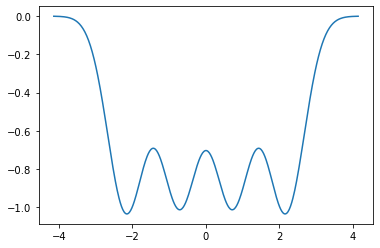

In [3]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)

V1 = dvr.Vfun(x, 0, 0)
plt.plot(x, V1)

E, W, parity = eigen_basis(dvr)
A, U = optimization(dvr, E, W, parity)
A = A[0]
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

$L=5$ site

In [16]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0=R0,
              lattice=np.array([5], dtype=int),
              lc=(1350, 1500),
              trap=(50, [930, 1250]),
              band=1,
              dim=3,
              avg=1,
              sparse=True,
              homogenize=True,
              symmetry=True)


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=[930, 1250]nm
lattice: Full lattice sizes: [5 1 1]
lattice: lattice constants: [1.4516129  1.61290323 1.4516129 ]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[39 20 20] is set.
DVR: R0=[5.90322581 3.         7.2       ]w is set.
H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 5 states are to be calculated.
H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.97s.
H_solver: eigenstates memory usage: 0.67 MiB.
H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 5 states are to be calculated.
H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonali

H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 5 states are to be calculated.
H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.09s.
H_solver: eigenstates memory usage: 0.67 MiB.
H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 5 states are to be calculated.
H_op: n=[39 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.70s.
H_solver: eigenstates memory usage: 0.66 MiB.
Optimizing...
Terminated - min grad norm reached after 123 iterations, 0.04 seconds.

Trap site position of Wannier functions: [4 0 3 1 2]
Order of Wannier function is set to match trap site.
mu_i =  [-35.81740835 -35.98012625 -36.25808959 -35.9801263  -35.81740835]

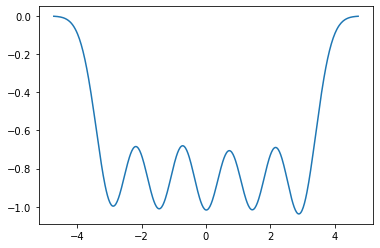

In [18]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)

V1 = dvr.Vfun(x, 0, 0)
plt.plot(x, V1)

E, W, parity = eigen_basis(dvr)
A, U = optimization(dvr, E, W, parity)
A = A[0]
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))